In [1]:
from IPython import get_ipython
get_ipython().run_line_magic("reset","-f")

from PyPackageJonas import *

figures_path = "C:/Users/jonas/Git/Analysis-of-Production-flow-systems-with-focus-on-industry/Latex Thesis/figures/"


In [3]:
X = np.array([1,25,40,83,123,256,1,27,49,84,126,257,1,27,49,84,129,311,5,30,54,84,134,314,7,30,56,90,144,322,8,31,56,91,147,369,8,31,62,92,153,415,13,32,63,93,163,573,14,34,65,93,167,609,14,35,65,103,175,640,17,36,67,103,228,737,18,37,75,111,231,21,38,76,112,235,21,39,79,119,242,22,39,82,122,256])
print(X.max() - X.min())
X = (X - X.min()) / (X.max() - X.min())

Y = X.copy()
np.random.shuffle(Y)

736


In [15]:
X = np.random.uniform(size = 300)
Y = X.copy()
np.random.shuffle(Y)

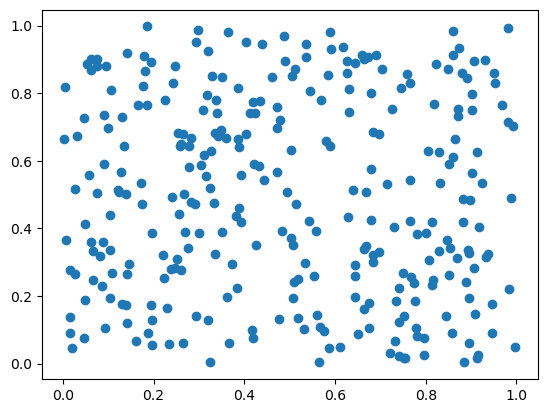

In [3]:
plt.scatter(X,Y)

In [10]:
h = 100**(-1/5) * np.vstack([X,Y]).var(axis = 1)**0.5
h

array([0.11242345, 0.11242345])

In [16]:
kern_nn = KernelJones2D_nonnegative(np.vstack([X,Y]))

Computing normalization constants


In [69]:
xx, yy = np.meshgrid(np.linspace(0,1,500), np.linspace(0,1,500))

In [17]:
res_nn = kern_nn(np.array([xx.flatten(), yy.flatten()]))

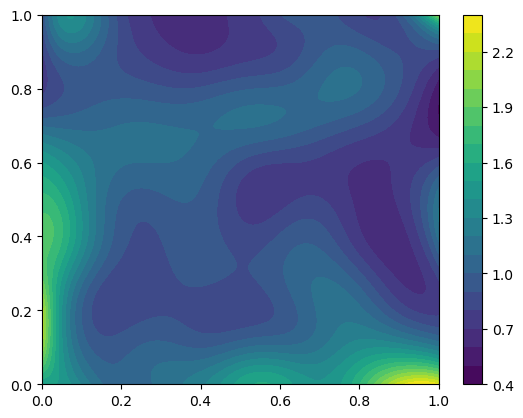

In [18]:
z_nn = res_nn.copy()
z_nn = np.reshape(z_nn, (500,500))
plt.contourf(xx, yy, z_nn, levels=20)
plt.colorbar()

In [19]:
Hxy = - (z_nn  * np.log(z_nn)).mean()
Hx = (z_nn.mean(axis = 0) * np.log(z_nn.mean(axis = 0))).mean()
Hy = (z_nn.mean(axis = 1) * np.log(z_nn.mean(axis = 1))).mean()

Hx + Hy - Hxy

# 0.02985301897471753
# 0.04713341320621767

0.04713341320621767

# Not non-negative

In [70]:
kern = KernelJones2D(np.vstack([X,Y]))

In [71]:
res = kern(np.array([xx.flatten(), yy.flatten()]))

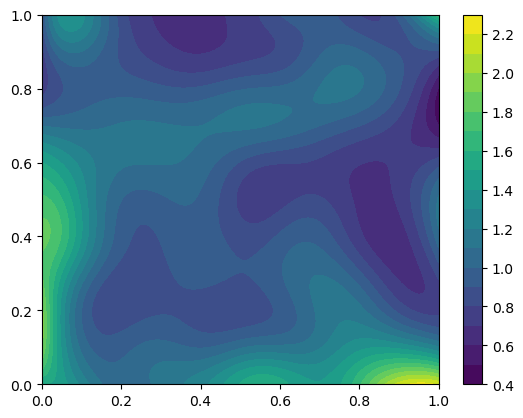

In [72]:
z = res.copy()
z = np.reshape(z, (500,500))
plt.contourf(xx, yy, z, levels = 20)
plt.colorbar()

In [25]:
z.max(), z.min()

(2.235263472388769, 0.4385163743783911)

In [13]:
z.sum() * 1/1000**2

1.0005865319510334

# kernel 1D

In [26]:
kern = KernelJones1D(X)

(1.0, 2.2529880510361338e-09)

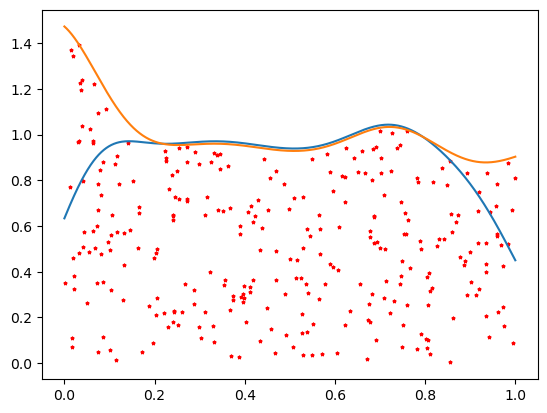

In [56]:
xx = np.linspace(0,1,10000)

dx = xx[1] - xx[0]

n = X.__len__()

h = n**(-1/5) * X.var()**0.5
# h = 0.05434782608695652

kde = gaussian_kde(X, h / X.var()**0.5)

plt.plot(xx,kde(xx))
plt.plot(xx,kern(xx))
plt.scatter(X,np.random.random(X.shape) * kern(X), color = 'r', marker = "*", s = 5)

scipy.integrate.quad(lambda x : kern(x), 0, 1)

(array([1.40521586, 1.35502958, 0.50186281, 1.20447074, 0.90335305,
        1.0539119 , 0.85316677, 0.95353933, 0.95353933, 0.65242165,
        1.40521586, 1.0539119 , 1.00372562, 0.70260793, 1.0539119 ]),
 array([0.0022421 , 0.06866131, 0.13508053, 0.20149974, 0.26791896,
        0.33433817, 0.40075739, 0.4671766 , 0.53359581, 0.60001503,
        0.66643424, 0.73285346, 0.79927267, 0.86569189, 0.9321111 ,
        0.99853031]),
 <BarContainer object of 15 artists>)

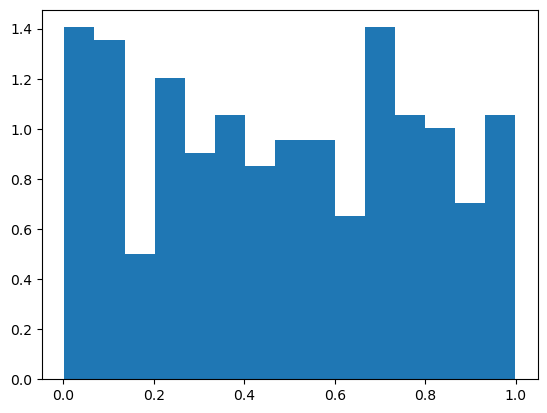

In [32]:
plt.hist(X, 15, density = True)

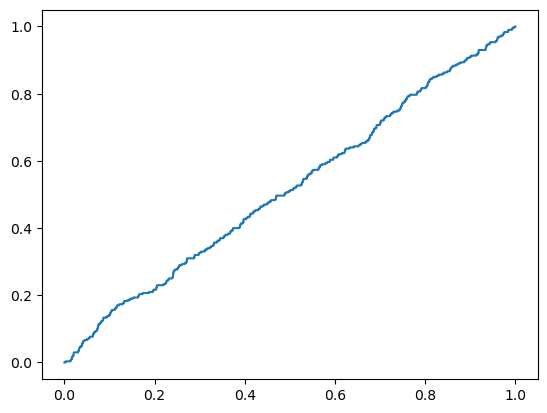

In [33]:
plt.plot(xx,scipy.stats.ecdf(X).cdf.evaluate(xx))

In [55]:
kern(xx).mean()

1.0000018770836023

In [66]:
temp = kern(xx)
(temp[1:] + temp[:-1]).mean() / 2

1.0000000019863542

In [61]:
c = scipy.integrate.quad(kde, 0,1)

kde_n = lambda x : kde(x) / c[0]
scipy.integrate.quad(kde_n, 0,1)

(0.9999999999999998, 2.331384584518259e-09)

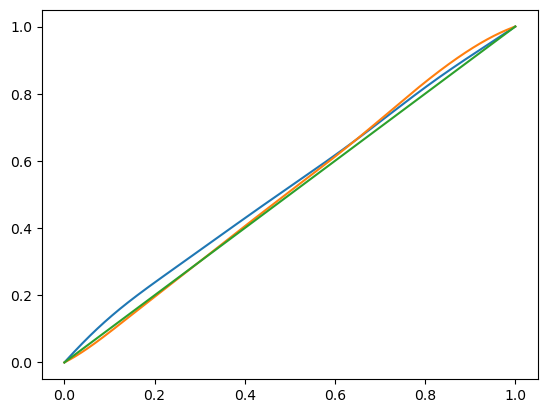

In [62]:
plt.plot(xx, kern(xx).cumsum() * dx)
plt.plot(xx, kde_n(xx).cumsum() * dx)
plt.plot(xx,xx)

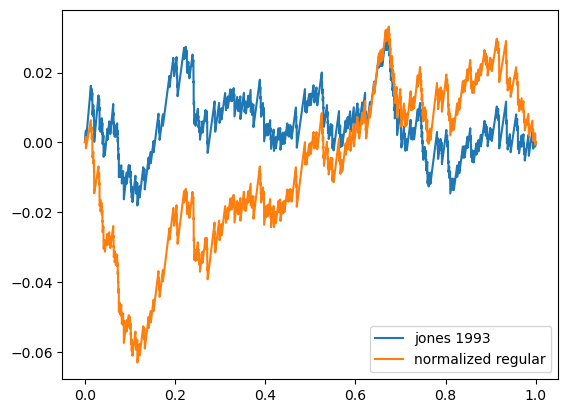

In [65]:
plt.plot(xx, kern(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx), label = "jones 1993")
plt.plot(xx, kde_n(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx), label = "normalized regular")
plt.legend()